In [2]:
# Importing all required libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt

In [3]:
# Loading iris dataset from sklearn
iris = datasets.load_iris()

In [1]:
# Reviewing the data. This outputs the data content inside 
# variable iris. It is too large so didnot include the output 
# here. The description of data is below.
iris

In [5]:
# The iris data is a dictionary of features, targets, and other 
# metadatas. 
# The key 'data' contains all the features, and the key 'target' 
# contains the classes for respective features.
# Here, we are simply assigning features and target values to 
# variable X & y respectively.
X = iris.data
y = iris.target

# Exploratory Data Analysis

In [6]:
# View the available name of the features that we are analysing
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [8]:
# View the available name of the targets that we want to predict
print(iris.target_names)


['setosa' 'versicolor' 'virginica']


In [7]:
# Creating dataframe from features & targets. This is done in order 
# to make the analysis easier.
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['target'] = y

In [8]:
# View the shape of the dataframe.
iris_df.shape

# Altogether there are 150 rows with 5 columns

(150, 5)

In [9]:
# Check the first five rows of the dataframe.
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
# View the basic information of dataframe such as available columns, 
# column data types. 
# This is essential to find out if any columns are being mapped to 
# undesired data type 
# and if we need to change the data type for that particular column.
# In this case, no such step is required.
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [13]:
# Get the brief summary of statistical measures for each column/
# features in the dataset.
# For example, in the output below, we can see the mean, and std 
# of column sepal length (cm) 
# as 5.8 and 0.82 respectively.
# It is essential to check the summary because it gives us the 
# general idea of how our data is distributed. 
iris_df.describe(include='all')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [14]:
# Check for null values. There are no null values here. So, no 
# action required.
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

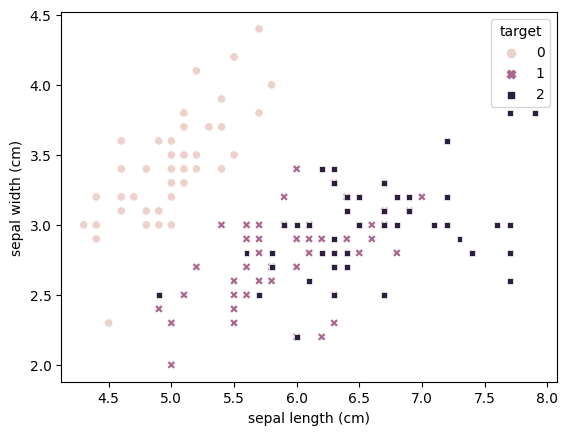

In [15]:
# Visualizing how target is related to the features sepal length 
# (cm) and sepal width (cm) in scatterplot.
scatter_plot = sns.scatterplot( data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='target', style='target')
# scatter_plot.fig.set_size_inches(10, 9)
plt.show()

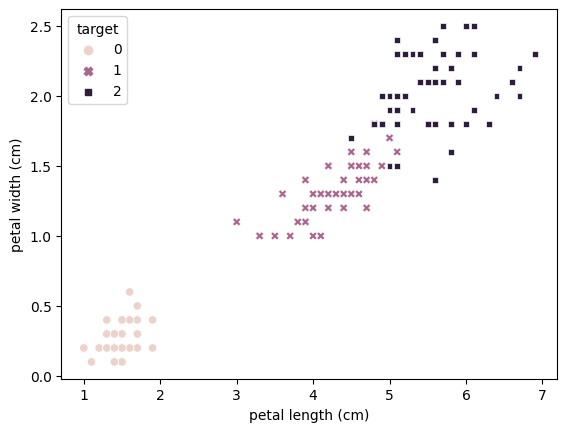

In [16]:
# Visualizing how target class is related to the features petal length (cm) and petal width (cm) in scatterplot
scatter_plot = sns.scatterplot( data=iris_df, x='petal length (cm)', y='petal width (cm)', hue='target', style='target')
# scatter_plot.fig.set_size_inches(10, 9)
plt.show()

Looking at above two scatter plots we can say that the target variable is more linearly dependent on the features (petal width and petal length) than the features (sepal width and sepal length)

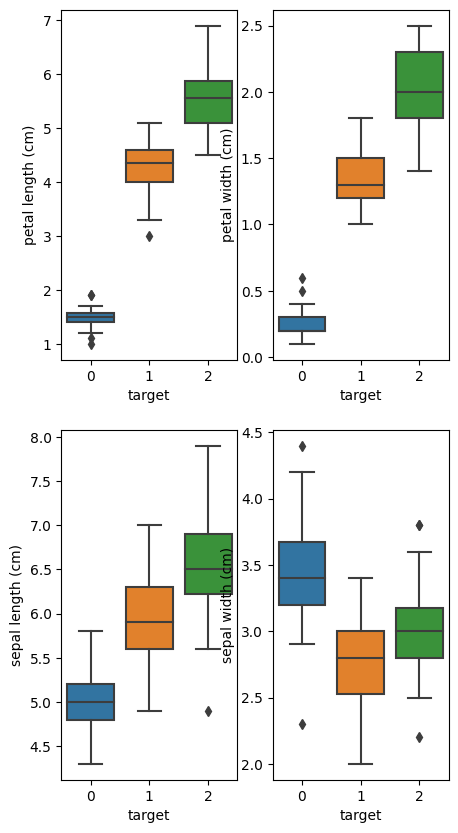

In [17]:
# Visualizing how distribution of data in each feature with respect to the target variable.
plt.figure(figsize = (5,10))
plt.subplot(2, 2, 1)
sns.boxplot(x = 'target', y = iris.feature_names[2], data=iris_df)
plt.subplot(2, 2, 2)
sns.boxplot(x = 'target', y = iris.feature_names[3], data=iris_df)
plt.subplot(2, 2, 3)
sns.boxplot(x = 'target', y = iris.feature_names[0], data=iris_df)
plt.subplot(2, 2, 4)
sns.boxplot(x = 'target', y = iris.feature_names[1], data=iris_df)
plt.show()

In the above boxplot, we can see a few outliers for each features with respect to the target. we can see greater variability for the feature "sepal width" along with greater outliers. The feature "petal width" looks positively skewed for targets "1" & "2". Most importantly, the median of each box plot within particular features falls in different point than the other boxplots for the same features. This means, the features are distinctive to represent each targets.

In [18]:
# Determined correlations among all the variables in the dataset
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


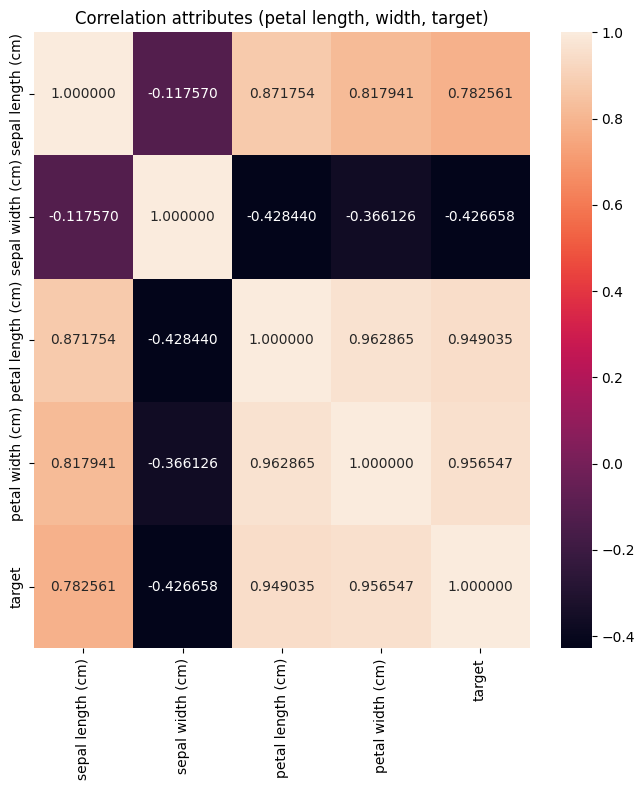

In [19]:
#  Visulaize correlations among all the variables in the dataset using heatmap
plt.subplots(figsize = (8, 8))
sns.heatmap(iris_df.corr(), annot=True, fmt='f').set_title("Correlation attributes (petal length, width, target)")
plt.show()

From the above plot, we can see that the target variable is more related to the feature petal width and least related to the feature sepal width.

# Model Building

In [20]:
from sklearn.model_selection import train_test_split

# Diving the whole dataset into training and testing samples (i.e 80%-training & 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)

In [21]:
from sklearn.preprocessing import StandardScaler

# Our feature values falls on different range. So, normalizing the feature value is essential to avoid any bias.
# Thus, using standard scaler approach to do the same.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
from sklearn.naive_bayes import GaussianNB

# Training the naive bayes classifier witht eh training data sample
classifier = GaussianNB()
classifier.fit(X_train_scaled, Y_train)

GaussianNB()

In [23]:
# Making predictions for the test data samples.
pred = classifier.predict(X_test_scaled)

This is a classification problem where we need to determine the type of flower based on the features sepal length, sepal width, petal length and petal width. So, in coditional probability, this problem is similar to finding the probability of a flower to belong in particular class given its features (i.e sepal length, petal length, sepal width, and petal width.). We do have multiple features as well as their respective target variables. This is why we are using Naive Bayes classifier with assumption that the features are independent with each other. Also, we are using Gausian Naive Bayes classifier specifically because the features are continuous and not discreet.

Other types of Naive Bayes Classifier are:
1. Multinomial Naive Bayes Classifier: It is used when features have miltinomial distribution.
2. Bernoulli Naive Bayes classifier: It is used when features are of boolean type.

# Model Evaluation

In [24]:
from sklearn.metrics import confusion_matrix

# Calculating confusion matrix to see how well the model performed on test dataset.
cm = confusion_matrix(Y_test, pred)

cm

array([[ 8,  0,  0],
       [ 0, 11,  1],
       [ 0,  1,  9]])

Text(0.5, 23.52222222222222, 'Predicted class')

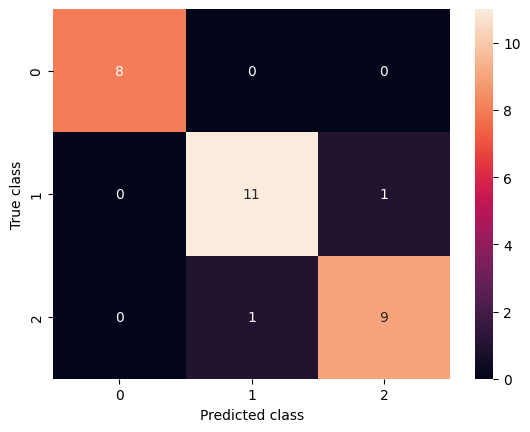

In [27]:
# Visualizing confusion matrix using heatmap
sns.heatmap(cm, annot=True)
plt.ylabel('True class')
plt.xlabel('Predicted class')

From the above visualization, we can see that our classifier is able to correctly classify maximum test dataset except for 2. Class 1 is classified as 2 while 2 is classified as one.

In [28]:
from sklearn.metrics import accuracy_score

# Caculating accuracy of the model
accuracy = accuracy_score(Y_test, pred)

print("The accuracy of the model is: {0}".format(accuracy))

The accuracy of the model is: 0.9333333333333333


In [32]:
from sklearn.metrics import precision_score

# Caculating precision of the model
precision = precision_score(Y_test, pred, average='macro')

print("The precision of the model is: {0}".format(precision))

The precision of the model is: 0.9388888888888888


In [33]:
from sklearn.metrics import recall_score

# Caculating recall of the model
recall = recall_score(Y_test, pred, average='macro')

print("The recall score of the model is: {0}".format(recall))

The recall score of the model is: 0.9388888888888888


Looking at precision, accuracy, and recall value we can that the model performs quite well. Higher precision means that an algorithm returns more relevant results than irrelevant ones, and high recall means that an algorithm returns most of the relevant results

- Accuracy refers to the overall degree by which a model can correctly classify given example set.
- The precision reflects how reliable the model is in classifying samples as Positive.
- The recall measures the model's ability to detect Positive samples.
- Confusion Matrix helps us to visualize the model performance by comparing the predicted values with ground truth for each class.